# Load the data

In [2]:
# add code here
import pandas as pd

iris_df = pd.read_csv('../../datasets/iris.csv', index_col=0 )
iris_df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


# Split the data into train and test

In [5]:
# add code here
from sklearn.model_selection import train_test_split

X = iris_df.iloc[:, 0:4]
y = iris_df.iloc[:, 4]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
x_train.shape, x_test.shape

((120, 4), (30, 4))

# Train a Random Forest model

In [6]:
# add code here
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators= 100, criterion= 'gini', max_depth= None, min_samples_split= 2, min_samples_leaf= 1, max_features= 'sqrt', bootstrap= True, oob_score= True, random_state= 123, verbose= 1, class_weight= None)
rf.fit(x_train, y_train)
rf

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


RandomForestClassifier(oob_score=True, random_state=123, verbose=1)

# Draw the 4th tree of the forest

[Text(0.5, 0.9285714285714286, 'x[2] <= 2.45\ngini = 0.654\nsamples = 80\nvalue = [34, 51, 35]'),
 Text(0.4230769230769231, 0.7857142857142857, 'gini = 0.0\nsamples = 23\nvalue = [34, 0, 0]'),
 Text(0.5769230769230769, 0.7857142857142857, 'x[2] <= 4.85\ngini = 0.483\nsamples = 57\nvalue = [0.0, 51.0, 35.0]'),
 Text(0.3076923076923077, 0.6428571428571429, 'x[0] <= 4.95\ngini = 0.074\nsamples = 32\nvalue = [0, 50, 2]'),
 Text(0.15384615384615385, 0.5, 'x[2] <= 3.9\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.07692307692307693, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.23076923076923078, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.5, 'x[2] <= 4.75\ngini = 0.039\nsamples = 30\nvalue = [0, 49, 1]'),
 Text(0.38461538461538464, 0.35714285714285715, 'gini = 0.0\nsamples = 27\nvalue = [0, 46, 0]'),
 Text(0.5384615384615384, 0.35714285714285715, 'x[1] <= 2.9\ngini = 0.375\nsamples = 3\nvalue = [0, 3,

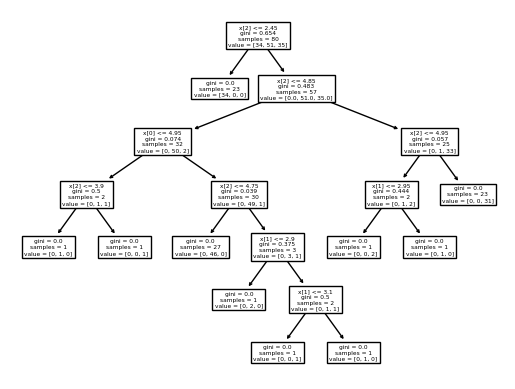

In [7]:
# add code here
estimator = rf.estimators_[3]

from sklearn import tree

tree.plot_tree(estimator)

# Evaluate the model

In [8]:
# add code here
from sklearn.metrics import accuracy_score

y_pred = rf.predict(x_test)
y_pred

accuracy_score(y_test, y_pred)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


0.9333333333333333

# Which feature is the most important?

<BarContainer object of 4 artists>

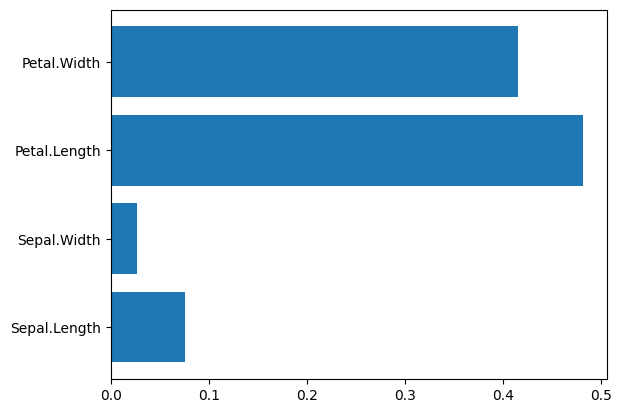

In [9]:
# add code here
import matplotlib.pyplot as plt

plt.barh(x_train.columns, rf.feature_importances_)

## Train and evaluate a AdaBoost model (compare the results with the Random Forest)

In [10]:
# add code here
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Passo 1: Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Passo 2: Treinar os modelos
# AdaBoost
adaboost_model = AdaBoostClassifier(n_estimators=100, random_state=123)
adaboost_model.fit(X_train, y_train)

# Random Forest
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=123)
random_forest_model.fit(X_train, y_train)

# Passo 3: Avaliar os modelos
# AdaBoost
adaboost_pred = adaboost_model.predict(X_test)
adaboost_accuracy = accuracy_score(y_test, adaboost_pred)
print("AdaBoost Accuracy:", adaboost_accuracy)
print("Classification Report (AdaBoost):\n", classification_report(y_test, adaboost_pred))

# Random Forest
random_forest_pred = random_forest_model.predict(X_test)
random_forest_accuracy = accuracy_score(y_test, random_forest_pred)
print("Random Forest Accuracy:", random_forest_accuracy)
print("Classification Report (Random Forest):\n", classification_report(y_test, random_forest_pred))


AdaBoost Accuracy: 1.0
Classification Report (AdaBoost):
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Random Forest Accuracy: 1.0
Classification Report (Random Forest):
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


/Users/tiago/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
